**Doug Marcum  
DSC 540 - Term Project Milestone 2**  

### Cleaning/Formatting Flat File Source 

Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example: Replace Headers, format data into a more readable format, identify outliers and bad data, find duplicates, fix casing or inconsistent values, conduct Fuzzy Matching.

In [1]:
# load libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load/import data
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv'
df_flat = pd.read_csv(url)

# display first 5 rows
df_flat.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [3]:
# quick info on the data
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Columns: 146 entries, _id to Yorkdale-Glen Park
dtypes: int64(1), object(145)
memory usage: 2.7+ MB


In [4]:
# look at the data types
df_flat.dtypes

_id                         int64
Category                   object
Topic                      object
Data Source                object
Characteristic             object
                            ...  
Wychwood                   object
Yonge-Eglinton             object
Yonge-St.Clair             object
York University Heights    object
Yorkdale-Glen Park         object
Length: 146, dtype: object

### Clean Header

In [5]:
# make headers lowercase and remove white spacing/replace with '_' for a more consistent header
df_flat.columns = map(str.lower, df_flat.columns)
df_flat.columns = [x.strip().replace(' ', '_') for x in df_flat.columns]
df_flat.columns = [x.strip().replace('.', '_') for x in df_flat.columns]
print(df_flat.columns.values)

['_id' 'category' 'topic' 'data_source' 'characteristic' 'city_of_toronto'
 'agincourt_north' 'agincourt_south-malvern_west' 'alderwood' 'annex'
 'banbury-don_mills' 'bathurst_manor' 'bay_street_corridor'
 'bayview_village' 'bayview_woods-steeles' 'bedford_park-nortown'
 'beechborough-greenbrook' 'bendale' 'birchcliffe-cliffside' 'black_creek'
 'blake-jones' 'briar_hill-belgravia' 'bridle_path-sunnybrook-york_mills'
 'broadview_north' 'brookhaven-amesbury'
 'cabbagetown-south_st__james_town' 'caledonia-fairbank' 'casa_loma'
 'centennial_scarborough' 'church-yonge_corridor' 'clairlea-birchmount'
 'clanton_park' 'cliffcrest' 'corso_italia-davenport' 'danforth'
 'danforth_east_york' 'don_valley_village' 'dorset_park'
 'dovercourt-wallace_emerson-junction' 'downsview-roding-cfb'
 'dufferin_grove' 'east_end-danforth' 'edenbridge-humber_valley'
 'eglinton_east' 'elms-old_rexdale' 'englemount-lawrence'
 'eringate-centennial-west_deane' 'etobicoke_west_mall' 'flemingdon_park'
 'forest_hill_nor

In [6]:
# after looking at the column names, there are still a few errors to correct
# 'cabbagetown-south_st__james_town' has an extra '_'
# 'mimico_(includes_humber_bay_shores) should be 'mimico' 
# 'north_st__james_town' has an extrea '_'
df_flat = df_flat.rename(columns = {'cabbagetown-south_st__james_town': 'cabbagetown-south_st_james_town',
                                    'mimico_(includes_humber_bay_shores)': 'mimico',
                                    'north_st__james_town': 'north_st_james_town'})

### Remove Unnecessary Initial Rows and Columns

In [7]:
# get shape to understand the amount of data to be worked with
print('Shape of the date:', df_flat.shape)
print('')

# list all categories
print('Unique Categories:', df_flat['category'].unique())
print('')

# list all topics
print('Unique Topics:', df_flat['topic'].unique())

Shape of the date: (2383, 146)

Unique Categories: ['Neighbourhood Information' 'Population'
 'Families, households and marital status' 'Language' 'Income'
 'Immigration and citizenship' 'Visible minority' 'Ethnic origin'
 'Aboriginal peoples' 'Education' 'Housing' 'Language of work' 'Labour'
 'Journey to work' 'Mobility']

Unique Topics: ['Neighbourhood Information' 'Population and dwellings'
 'Age characteristics' 'Household and dwelling characteristics'
 'Marital status' 'Family characteristics' 'Household type'
 'Family characteristics of adults' 'Knowledge of official languages'
 'First official language spoken' 'Mother tongue' 'Knowledge of languages'
 'Income of households in 2015' 'Language spoken most often at home'
 'Income of individuals in 2015' 'Other language spoken regularly at home'
 'Low income in 2015' 'Income of economic families in 2015'
 'Immigrants by selected place of birth' 'Citizenship'
 'Visible minority population'
 'Immigrant status and period of immigration

In [8]:
# drop '_id', 'Data Source' as they are irrelevant
df_flat = df_flat.drop(columns = ['_id', 'data_source'])

# drop row for 'TSNS2020 Designation' as it is irrelevant
df_flat = df_flat.drop([1])

# drop rows containing 'Journey to work', 'Language of work', 'Visible minority', 'Aboriginal peoples', 'Language',
# 'Mobility' as it is either irrelevant or contained in a different data category
df_flat = df_flat[df_flat.category != 'Journey to work']
df_flat = df_flat[df_flat.category != 'Language of work']
df_flat = df_flat[df_flat.category != 'Language']
df_flat = df_flat[df_flat.category != 'Visible minority']
df_flat = df_flat[df_flat.category != 'Aboriginal peoples']
df_flat = df_flat[df_flat.category != 'Mobility']

In [9]:
df_flat.shape

(1202, 144)

In [10]:
# remove as many percentages from the data as possible so we can work with whole numbers
df_flat = df_flat[~df_flat.characteristic.str.contains("(per cent)")]
df_flat = df_flat[~df_flat.characteristic.str.contains("Population Change 2011-2016")]
df_flat = df_flat[~df_flat.characteristic.str.contains("Rate of")]
df_flat = df_flat[~df_flat.characteristic.str.contains("Unemployment rate")]
df_flat = df_flat[~df_flat.characteristic.str.contains("Employment rate")]
df_flat = df_flat[~df_flat.characteristic.str.contains("Participation rate")]
df_flat.shape

(1182, 144)

In [11]:
# list all categories
print('Unique Categories:', df_flat['category'].unique())
print('')

# list all topics
print('Unique Topics:', df_flat['topic'].unique())

Unique Categories: ['Neighbourhood Information' 'Population'
 'Families, households and marital status' 'Income'
 'Immigration and citizenship' 'Ethnic origin' 'Education' 'Housing'
 'Labour']

Unique Topics: ['Neighbourhood Information' 'Population and dwellings'
 'Age characteristics' 'Household and dwelling characteristics'
 'Marital status' 'Family characteristics' 'Household type'
 'Family characteristics of adults' 'Income of households in 2015'
 'Income of individuals in 2015' 'Low income in 2015'
 'Income of economic families in 2015'
 'Immigrants by selected place of birth' 'Citizenship'
 'Immigrant status and period of immigration' 'Ethnic origin population'
 'Age at immigration' 'Highest certificate, diploma or degree'
 'Recent immigrants by selected place of birth' 'Generation status'
 'Admission category and applicant type' 'Household characteristics'
 'Core housing need'
 'Major field of study - Classification of Instructional Programs (CIP) 2016'
 'Location of study comp

In [12]:
# reset index and drop additional 'index' column
df_flat = df_flat.reset_index(drop = True)
df_flat.head()

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Neighbourhood Information,Neighbourhood Information,Neighbourhood Number,NaN,129,128,20,95,42,34,...,37,7,137,64,60,94,100,97,27,31
1,Population,Population and dwellings,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695","15,873",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
2,Population,Population and dwellings,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177","26,918","15,434",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
3,Population,Population and dwellings,Total private dwellings,"1,179,057","9,371","8,535","4,732","18,109","12,473","6,418",...,"8,054","8,721","19,098","5,620","3,604","6,185","6,103","7,475","11,051","5,847"
4,Population,Population and dwellings,Private dwellings occupied by usual residents,"1,112,929","9,120","8,136","4,616","15,934","12,124","6,089",...,"7,549","8,509","18,436","5,454","3,449","5,887","5,676","7,012","10,170","5,344"


### Convert all fields from strings to numeric *that need to be numeric*

In [13]:
# create dataframe from the first 3 columns
df_3 = df_flat[df_flat.columns[0:3]]

#create dataframe from remaining columns(141 columns)
df_convert = df_flat[df_flat.columns[3:]]

# remove commas (,) by using replace, remove percentage (%) by using replace
df_convert = df_convert.replace(',', '', regex=True)
df_convert = df_convert.replace('%', '', regex=True)

# apply to numeric to convert strings to numeric
df_convert = df_convert.apply(pd.to_numeric)

# concat the dataframes back into one
df_flat = pd.concat([df_3, df_convert], axis=1, sort=False)
df_flat

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Neighbourhood Information,Neighbourhood Information,Neighbourhood Number,NaN,129.0,128.0,20.0,95.0,42.0,34.0,...,37.0,7.0,137.0,64.0,60.0,94.0,100.0,97.0,27.0,31.0
1,Population,Population and dwellings,"Population, 2016",2731571.0,29113.0,23757.0,12054.0,30526.0,27695.0,15873.0,...,16936.0,22156.0,53485.0,12541.0,7865.0,14349.0,11817.0,12528.0,27593.0,14804.0
2,Population,Population and dwellings,"Population, 2011",2615060.0,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,...,15004.0,21343.0,53350.0,11703.0,7826.0,13986.0,10578.0,11652.0,27713.0,14687.0
3,Population,Population and dwellings,Total private dwellings,1179057.0,9371.0,8535.0,4732.0,18109.0,12473.0,6418.0,...,8054.0,8721.0,19098.0,5620.0,3604.0,6185.0,6103.0,7475.0,11051.0,5847.0
4,Population,Population and dwellings,Private dwellings occupied by usual residents,1112929.0,9120.0,8136.0,4616.0,15934.0,12124.0,6089.0,...,7549.0,8509.0,18436.0,5454.0,3449.0,5887.0,5676.0,7012.0,10170.0,5344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Income,Income taxes,Net federal tax: Average amount ($),11542.0,4795.0,5102.0,7895.0,30496.0,14370.0,8645.0,...,10050.0,7742.0,4737.0,10297.0,8049.0,11560.0,20794.0,27170.0,4420.0,6119.0
1178,Income,Income taxes,Net federal tax: Aggregate amount ($'000),14680842.0,52315.0,48753.0,54161.0,508525.0,219140.0,64491.0,...,76583.0,84656.0,93634.0,65954.0,34368.0,77742.0,140984.0,218987.0,47600.0,41518.0
1179,Income,Income taxes,Provincial and territorial income taxes: P...,1339410.0,11585.0,10060.0,7060.0,17930.0,15915.0,7830.0,...,8240.0,11530.0,20985.0,6635.0,4350.0,7105.0,7090.0,8530.0,11525.0,7115.0
1180,Income,Income taxes,Provincial and territorial income taxes: A...,6676.0,2472.0,2642.0,4274.0,18254.0,8509.0,4814.0,...,5347.0,4150.0,2403.0,5643.0,4331.0,6635.0,12435.0,16766.0,2227.0,3244.0


### Null/NaN/Blank Values

In [14]:
# quick function to look for missing values in each column
def miss_values(df):
    for c in df.columns:
        miss = df[c].isnull().sum() 
        if miss > 0: 
            print(f'Missing value(s) for {c}: {miss}') 
        else: 
            print(f'0 missing values for {c}')

# check if any columns are null
miss_values(df_flat)

0 missing values for category
0 missing values for topic
0 missing values for characteristic
Missing value(s) for city_of_toronto: 1
Missing value(s) for agincourt_north: 52
Missing value(s) for agincourt_south-malvern_west: 52
Missing value(s) for alderwood: 52
Missing value(s) for annex: 52
Missing value(s) for banbury-don_mills: 52
Missing value(s) for bathurst_manor: 52
Missing value(s) for bay_street_corridor: 52
Missing value(s) for bayview_village: 52
Missing value(s) for bayview_woods-steeles: 52
Missing value(s) for bedford_park-nortown: 52
Missing value(s) for beechborough-greenbrook: 52
Missing value(s) for bendale: 52
Missing value(s) for birchcliffe-cliffside: 52
Missing value(s) for black_creek: 52
Missing value(s) for blake-jones: 52
Missing value(s) for briar_hill-belgravia: 52
Missing value(s) for bridle_path-sunnybrook-york_mills: 52
Missing value(s) for broadview_north: 52
Missing value(s) for brookhaven-amesbury: 52
Missing value(s) for cabbagetown-south_st_james_to

In [15]:
'''A review of the rows with NaN values shows that the data is only available for the city of Toronto as a whole
and not for each neighborhood. 1 cell is for the neiborhood id number. For toronto, we will replace with '10000'.
The other rows will be dropped as they are not relevant to the analysis.'''

# change NaN value for Tornoto Neighborhood ID to 10000
df_flat.iloc[0,3] = '10000'

# making new data frame without NaN values 
df_new = df_flat.dropna(axis = 0, how ='any') 
  
# comparing sizes of data frames 
print("Old data frame length:", len(df_flat), "\nNew data frame length:",  
       len(df_new), "\nNumber of rows with at least 1 NA value removed: ", 
       (len(df_flat)-len(df_new))) 

Old data frame length: 1182 
New data frame length: 1130 
Number of rows with at least 1 NA value removed:  52


In [16]:
# quick check to make certain they were removed
miss_values(df_new)

0 missing values for category
0 missing values for topic
0 missing values for characteristic
0 missing values for city_of_toronto
0 missing values for agincourt_north
0 missing values for agincourt_south-malvern_west
0 missing values for alderwood
0 missing values for annex
0 missing values for banbury-don_mills
0 missing values for bathurst_manor
0 missing values for bay_street_corridor
0 missing values for bayview_village
0 missing values for bayview_woods-steeles
0 missing values for bedford_park-nortown
0 missing values for beechborough-greenbrook
0 missing values for bendale
0 missing values for birchcliffe-cliffside
0 missing values for black_creek
0 missing values for blake-jones
0 missing values for briar_hill-belgravia
0 missing values for bridle_path-sunnybrook-york_mills
0 missing values for broadview_north
0 missing values for brookhaven-amesbury
0 missing values for cabbagetown-south_st_james_town
0 missing values for caledonia-fairbank
0 missing values for casa_loma
0 mis

### Clean Categories

In [17]:
# Begin with Education as it contains data pertaining to field of study and location of study
# only interested in level of education obtained
print("Category 'Education' has", df_new[df_new.category == 'Education'].shape[0], "rows.")

# remove rows not related to level of education
df_new = df_new[~df_new.topic.str.contains('Major field')]
df_new = df_new[~df_new.topic.str.contains('Location of study')]

print("By removing unnecessary rows, category 'Education' now has", 
      df_new[df_new.category == 'Education'].shape[0], "rows.")

Category 'Education' has 182 rows.
By removing unnecessary rows, category 'Education' now has 30 rows.


In [18]:
# Ethnic Origins - Look for Duplicate Countries of Origin
df_new.category == 'Ethnic origin'
ethnic = df_new[df_new.category == 'Ethnic origin']
ethnic.characteristic.duplicated().any()

False

In [19]:
# Immigation and Citizenship - Look for Duplicates
df_new.category == 'Immigration and citizenship'
immigration = df_new[df_new.category == 'Immigration and citizenship']
immigration.characteristic.duplicated().any()

True

In [20]:
# Since we recieved a True value, the immigration subset will be explored
# displaying max rows to see the entire dataframe
pd.set_option('display.max_rows', immigration.shape[0]+1)

# sorting by 'characteristic' to find duplicates
immigration.sort_values(by = ['characteristic'])

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
343,Immigration and citizenship,Immigrant status and period of immigration,2001 to 2005,162775,2795.0,2320.0,425.0,910.0,1435.0,980.0,...,1550.0,1480.0,4525.0,230.0,195.0,375.0,290.0,300.0,1955.0,655.0
344,Immigration and citizenship,Immigrant status and period of immigration,2006 to 2010,167780,2750.0,2140.0,255.0,870.0,1665.0,1055.0,...,1335.0,875.0,4620.0,335.0,220.0,280.0,420.0,395.0,2235.0,660.0
339,Immigration and citizenship,Immigrant status and period of immigration,1981 to 1990,171565,3250.0,2255.0,605.0,1015.0,1790.0,795.0,...,875.0,1230.0,3645.0,475.0,360.0,630.0,325.0,365.0,1910.0,965.0
341,Immigration and citizenship,Immigrant status and period of immigration,1991 to 2000,281870,5595.0,3805.0,770.0,1405.0,2565.0,1685.0,...,2145.0,1805.0,7885.0,570.0,475.0,710.0,530.0,605.0,3405.0,1305.0
342,Immigration and citizenship,Immigrant status and period of immigration,2001 to 2010,330550,5535.0,4460.0,685.0,1790.0,3105.0,2035.0,...,2880.0,2360.0,9170.0,570.0,410.0,655.0,710.0,700.0,4190.0,1310.0
345,Immigration and citizenship,Immigrant status and period of immigration,2011 to 2016,187950,2165.0,1735.0,200.0,975.0,1500.0,1490.0,...,1675.0,1210.0,4925.0,265.0,130.0,315.0,600.0,670.0,2850.0,855.0
394,Immigration and citizenship,Immigrants by selected place of birth,Afghanistan,12740,40.0,150.0,0.0,25.0,35.0,15.0,...,30.0,50.0,740.0,0.0,0.0,0.0,0.0,20.0,215.0,20.0
450,Immigration and citizenship,Recent immigrants by selected place of birth,Afghanistan,3170,10.0,10.0,0.0,0.0,0.0,15.0,...,0.0,15.0,185.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
384,Immigration and citizenship,Immigrants by selected place of birth,Algeria,770,0.0,10.0,0.0,0.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
436,Immigration and citizenship,Recent immigrants by selected place of birth,Algeria,130,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After reviewing the data, there are no acutal duplicates in the column. There are duplicate values, but there are not in conflict, but rather showing **Recent immigrants by selected place of birth** and **Immigrants by selected place of birth.** While this infomation may appear to be duplications, it is not. 

In [21]:
# Population - Look for Outliers
df_new.category == 'Population'
population = df_new[df_new.category == 'Population']

# sorting by 'topic' and 'chacteristic' to find to group together population groups
pop_sorted = population.sort_values(by = ['topic', 'characteristic']).reset_index(drop = True)
pop_sorted

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Population,Age characteristics,Children (0-14 years),398135,3840.00,3075.00,1760.00,2360.00,3605.00,2325.0,...,1785.00,3555.00,9625.00,2325.0,1165.00,1860.00,1800.00,1210.00,4045.00,1960.00
1,Population,Age characteristics,Female: 0 to 04 years,66105,620.00,530.00,320.00,480.00,500.00,400.0,...,340.00,545.00,1530.00,445.0,240.00,305.00,300.00,230.00,680.00,285.00
2,Population,Age characteristics,Female: 05 to 09 years,65680,620.00,495.00,325.00,400.00,600.00,365.0,...,290.00,605.00,1650.00,420.0,190.00,315.00,325.00,200.00,660.00,325.00
3,Population,Age characteristics,Female: 10 to 14 years,62165,595.00,475.00,255.00,355.00,600.00,330.0,...,235.00,545.00,1545.00,275.0,155.00,255.00,300.00,155.00,615.00,345.00
4,Population,Age characteristics,Female: 100 years and over,650,10.00,0.00,5.00,25.00,20.00,10.0,...,10.00,10.00,15.00,0.0,5.00,20.00,0.00,5.00,0.00,10.00
5,Population,Age characteristics,Female: 15 to 19 years,71285,865.00,690.00,290.00,550.00,660.00,405.0,...,400.00,590.00,1575.00,260.0,135.00,250.00,245.00,165.00,855.00,430.00
6,Population,Age characteristics,Female: 20 to 24 years,97330,975.00,895.00,310.00,1520.00,650.00,510.0,...,705.00,650.00,1970.00,255.0,175.00,425.00,380.00,350.00,1395.00,455.00
7,Population,Age characteristics,Female: 25 to 29 years,119040,1005.00,975.00,350.00,2265.00,745.00,480.0,...,820.00,595.00,2040.00,390.0,235.00,680.00,705.00,750.00,1280.00,525.00
8,Population,Age characteristics,Female: 30 to 34 years,115675,935.00,835.00,430.00,1675.00,860.00,575.0,...,755.00,670.00,2015.00,560.0,330.00,620.00,575.00,695.00,1110.00,495.00
9,Population,Age characteristics,Female: 35 to 39 years,102240,775.00,715.00,450.00,1040.00,895.00,615.0,...,590.00,705.00,1900.00,600.0,390.00,510.00,520.00,440.00,970.00,480.00


In [22]:
# create male and female subsets
female = pop_sorted[1:22]
male = pop_sorted[22:43]

In [23]:
# plot female population
df_female = pd.DataFrame({'Age Group':female.characteristic, 'pop_female':female.city_of_toronto})
ax = df_female.plot.bar(x = 'Age Group', y = 'pop_female', rot = 90)

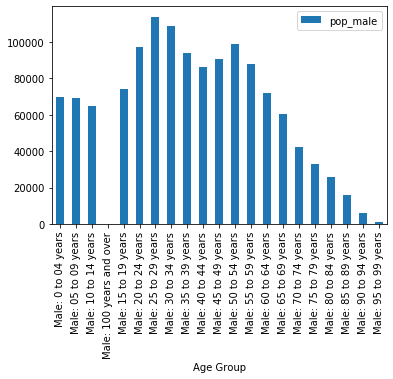

In [24]:
# plot male population
df_male = pd.DataFrame({'Age Group':male.characteristic, 'pop_male':male.city_of_toronto})
ax = df_male.plot.bar(x = 'Age Group', y = 'pop_male', rot = 90)

After reviewing the data and the plots, age groups over 95 years old for both male and female could be considered outliers. At this time, I will not remove them, but will note and see if it causes any issues with the data moving forward. 

The remaining categories (Families, Housing, Income, and Labor) are each filled with data I am not certain about what I will and will not use. All of the data in these categories has been touched, cleaned, and is in a readable format now. Until the two other data sets are included (API and Web Scraping), I will not make any additional alterations to this dataframe.   

In [25]:
# final dataframe 'df_neighborhoods' with index reset
df_neighborhoods = df_new.reset_index(drop = True)
df_neighborhoods

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Neighbourhood Information,Neighbourhood Information,Neighbourhood Number,10000,129.0,128.0,20.0,95.0,42.0,34.0,...,37.0,7.0,137.0,64.0,60.0,94.0,100.0,97.0,27.0,31.0
1,Population,Population and dwellings,"Population, 2016",2.73157e+06,29113.0,23757.0,12054.0,30526.0,27695.0,15873.0,...,16936.0,22156.0,53485.0,12541.0,7865.0,14349.0,11817.0,12528.0,27593.0,14804.0
2,Population,Population and dwellings,"Population, 2011",2.61506e+06,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,...,15004.0,21343.0,53350.0,11703.0,7826.0,13986.0,10578.0,11652.0,27713.0,14687.0
3,Population,Population and dwellings,Total private dwellings,1.17906e+06,9371.0,8535.0,4732.0,18109.0,12473.0,6418.0,...,8054.0,8721.0,19098.0,5620.0,3604.0,6185.0,6103.0,7475.0,11051.0,5847.0
4,Population,Population and dwellings,Private dwellings occupied by usual residents,1.11293e+06,9120.0,8136.0,4616.0,15934.0,12124.0,6089.0,...,7549.0,8509.0,18436.0,5454.0,3449.0,5887.0,5676.0,7012.0,10170.0,5344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Income,Income taxes,Net federal tax: Average amount ($),11542,4795.0,5102.0,7895.0,30496.0,14370.0,8645.0,...,10050.0,7742.0,4737.0,10297.0,8049.0,11560.0,20794.0,27170.0,4420.0,6119.0
974,Income,Income taxes,Net federal tax: Aggregate amount ($'000),1.46808e+07,52315.0,48753.0,54161.0,508525.0,219140.0,64491.0,...,76583.0,84656.0,93634.0,65954.0,34368.0,77742.0,140984.0,218987.0,47600.0,41518.0
975,Income,Income taxes,Provincial and territorial income taxes: P...,1.33941e+06,11585.0,10060.0,7060.0,17930.0,15915.0,7830.0,...,8240.0,11530.0,20985.0,6635.0,4350.0,7105.0,7090.0,8530.0,11525.0,7115.0
976,Income,Income taxes,Provincial and territorial income taxes: A...,6676,2472.0,2642.0,4274.0,18254.0,8509.0,4814.0,...,5347.0,4150.0,2403.0,5643.0,4331.0,6635.0,12435.0,16766.0,2227.0,3244.0


In [26]:
# save to csv for future use
df_neighborhoods.to_csv('neighborhood_demo.csv', index = False, header = True)